In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

**Explorar función randint de la librería random**


In [3]:
np.random.randint(1,101)

57

In [4]:
def ruleta():
  return np.random.randint(1,101)

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

In [5]:
#Definir las reglas del juego:
def juego():
  resultado=ruleta()
  return (resultado>50)&(resultado<100),resultado

In [6]:
juego()

(True, 76)

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

**Apostador simple.** Las caracterísitcas son:
* Se empieza con un capital inicial,
* Siempre se apuesta lo mismo,
* Y se va a apostar un número determinado de veces.
* Si se gana, se añade la apuesta al capital,
* Si se pierde, se descuenta la apuesta del capital.
* La función debe devolver un arreglo con el capital al final de cada apuesta.

In [7]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=np.zeros(n_apuestas+1)
  capital[0]=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital[i+1]=capital[i]+apuesta
    else:
      capital[i+1]=capital[i]-apuesta
  return capital

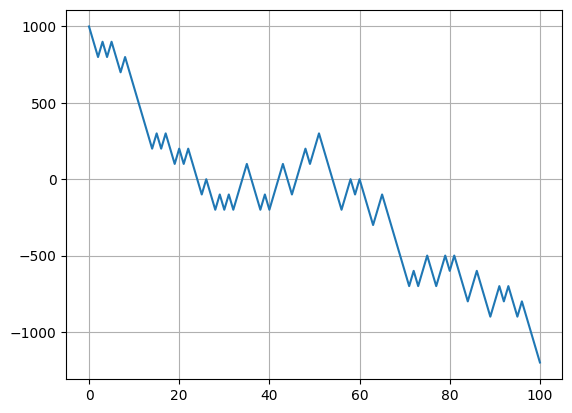

In [8]:
plt.plot(apostador(1000,100,100))
plt.grid()

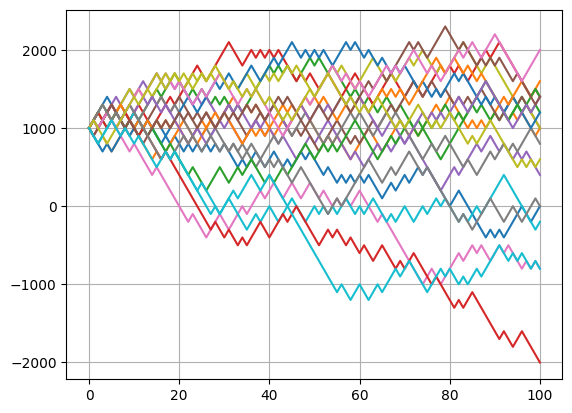

In [9]:
N=20 #20 simulaciones
for i in range(N):
  plt.plot(apostador(1000,100,100))
plt.grid()

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [10]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital+=apuesta
    else:
      capital-=apuesta
  return capital

In [11]:
N=1000
B=0
for i in range(N):
  B+=apostador(1000,100,100)<=0 #Cuántos apostadores llegan a la quiebra con respecto a su capital inicial
B/N

0.244

# Simulación de una máquina de estados finitos
Definimos los estados de la máquina:
* $\epsilon_0$: reposo.
* $\epsilon_1$: activo (en espera).
* $\epsilon_2$: proceso 1.
* $\epsilon_3$. proceso 2.

Estando en reposo, el 95% de las interrupciones pasan al estado activo, en el estdo activo, según los históricos, 6 de 10 órdenes mandan la máquina a hacer el proceso 1 y 3 a hacer el proceso 2. En el proceso 1 el 75% de las veces finaliza en la máquina en reposo. En el proceso 2, 5% de las veces es necesario ejecutarlo de nuevo.

Modelar la máquina de estado como una caminata aleatoria y evaluar la probabilidad de que después de 1000 operaciones termine en reposo. Usar el método Montecarlo con 10000 escenarios.

**Modelado**

Le asignamos un valor a cada estado:
\begin{eqnarray}
\epsilon_0&=&0\\
\epsilon_1&=&1\\
\epsilon_2&=&2\\
\epsilon_3&=&3\\
\end{eqnarray}

Le asigmanos una probabilidad y una suma a cada transición:
|estado inicial|estado final|probabilidad|suma|
|--------------|------------|------------|----|
|$\epsilon_0$|$\epsilon_1$|0.95|+1|
|$\epsilon_0$|$\epsilon_0$|0.05|+0|
|$\epsilon_1$|$\epsilon_1$|0.1|+0|
|$\epsilon_1$|$\epsilon_2$|0.6|+1|
|$\epsilon_1$|$\epsilon_3$|0.3|+2|
|$\epsilon_2$|$\epsilon_0$|0.75|-2|
|$\epsilon_2$|$\epsilon_1$|0.25|-1|
|$\epsilon_3$|$\epsilon_1$|0.95|-2|
|$\epsilon_3$|$\epsilon_3$|0.05|-0|

In [13]:
t=[-2,-1,0,1,2] #transición=posibles sumas
operaciones=1000
estado=0 #estado inicial
for i in range(operaciones):
  if estado==0:
    p=[0,0,0.05,0.95,0] #para sumarle -2 tengo probabilidad de 0, para -1 tengo 0, para 0 tengo 0.05, para +1 tengo 0.95 y para +2 tengo 0.
  elif estado==1:
    p=[0,0,0.1,0.6,0.3]
  elif estado==2:
    p=[0.75,0.25,0,0,0]
  else:
    p=[0.95,0,0.05,0,0]
  estado+=np.random.choice(t,p=p)

np.int64(1)